In [ ]:
import numpy as np
import pandas as pd

In [ ]:
url='https://drive.google.com/file/d/1ytWqOwYHpwWTCkK2wIel34T_HtHrPRFe/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
kota = pd.read_csv(url)
kota.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.00,241.42,80.78,59.22,80.24,57.85,115.19,209.32,119.36,51.81,25.98,41.40,204.34,139.60,231.00
1,241.42,0.00,183.66,296.98,256.23,183.57,133.08,139.73,221.60,227.80,238.46,223.04,306.59,241.85,28.56
2,80.78,183.66,0.00,140.00,151.89,129.50,186.84,268.83,191.00,123.46,54.80,39.38,275.99,211.25,150.82
3,59.22,296.98,140.00,0.00,135.80,113.41,169.41,264.88,174.92,107.38,85.20,100.62,259.90,195.16,325.54
4,80.24,256.23,151.89,135.80,0.00,84.40,125.78,224.13,134.17,29.50,97.09,112.51,219.15,154.41,284.79
5,57.85,183.57,129.50,113.41,84.40,0.00,53.12,151.47,61.51,48.69,74.70,90.12,146.49,81.75,212.13
6,115.19,133.08,186.84,169.41,125.78,53.12,0.00,100.98,91.16,101.81,132.04,147.46,176.14,111.40,161.64
7,209.32,139.73,268.88,264.88,224.13,151.47,100.98,0.00,189.51,200.16,214.03,229.45,274.49,209.75,168.29
8,119.36,221.60,174.92,174.92,134.17,61.51,91.16,189.51,0.00,110.20,136.20,151.62,86.68,21.94,250.16
9,51.81,227.80,107.38,107.38,29.50,48.69,101.81,200.16,110.20,0.00,68.66,84.08,195.19,130.45,256.36


In [ ]:
# Fungsi untuk mencari distance
def calc_dist(X, adj_mat):
    return sum( map( lambda x,y: adj_mat[x,y] ,X,np.roll(X,-1) ))

In [ ]:
# Parameter
n_kota = len(kota.columns) # Jumlah Kota
n_individu = 20 # Jumlah individu
a = 1
b = 15

#Generate Individu
gen_individu = lambda n_individu,n_kota,a,b: np.random.uniform(a,b,(n_individu,n_kota))
kunangs = gen_individu(n_individu,n_kota,a,b)
kunangs

array([[ 7.28571795, 12.87929208, 13.38692415,  4.37629327,  4.69776996,
         3.90345443,  6.07494472, 10.91164141,  1.16580247, 12.60310908,
         5.26870056,  8.7874722 , 11.67011346, 11.70503964, 11.33209754],
       [10.308518  ,  5.11486882, 12.95861256, 14.99893713,  8.88532258,
         7.46690252,  9.55287839,  9.4918383 ,  2.35029223, 11.42424238,
         8.19356684,  7.95188288,  4.63366892, 11.764934  ,  9.88139491],
       [ 1.88445356,  7.908644  , 10.31201779,  7.94874585,  4.22889584,
         7.89833929, 13.72543718,  5.29239722, 13.17042478, 11.5819828 ,
         4.95147884,  2.57571245,  8.17536508,  6.56684314,  3.43859528],
       [12.34453425,  5.27525415,  9.250863  ,  7.91637266,  1.10465826,
        12.92499821,  2.54318699, 11.36718126, 14.23008777, 13.47123425,
        11.41760457,  1.48876781,  5.86454946, 13.19109565,  7.13286676],
       [ 1.00830933,  1.28861912,  8.46818547,  2.96581017,  7.06361261,
        10.27409854, 11.91189534,  2.0000903 , 

In [ ]:
def diskritisasi(kunangs):
    return np.argsort(kunangs) # Diskritisasi menggunakan fungsi argsort 

In [ ]:
# Mengitung Fiteness
def calculate_fitness(kunangs,kota):
    d_kunangs = diskritisasi(kunangs) # menggunakan diskritisasi
    fitness = np.array(list(map(lambda x: calc_dist(x ,kota.values), d_kunangs) )) # fungsi mengitung fitness(ubah menjadi array)
    fitness = fitness.reshape( (-1,1) )
    return np.concatenate( (kunangs,fitness),axis=1) # cocatenate kunang-kunang dengan fitnes

In [ ]:
calculate_fitness(kunangs,kota)

array([[7.28571795e+00, 1.28792921e+01, 1.33869242e+01, 4.37629327e+00,
        4.69776996e+00, 3.90345443e+00, 6.07494472e+00, 1.09116414e+01,
        1.16580247e+00, 1.26031091e+01, 5.26870056e+00, 8.78747220e+00,
        1.16701135e+01, 1.17050396e+01, 1.13320975e+01, 2.27086000e+03],
       [1.03085180e+01, 5.11486882e+00, 1.29586126e+01, 1.49989371e+01,
        8.88532258e+00, 7.46690252e+00, 9.55287839e+00, 9.49183830e+00,
        2.35029223e+00, 1.14242424e+01, 8.19356684e+00, 7.95188288e+00,
        4.63366892e+00, 1.17649340e+01, 9.88139491e+00, 2.20565000e+03],
       [1.88445356e+00, 7.90864400e+00, 1.03120178e+01, 7.94874585e+00,
        4.22889584e+00, 7.89833929e+00, 1.37254372e+01, 5.29239722e+00,
        1.31704248e+01, 1.15819828e+01, 4.95147884e+00, 2.57571245e+00,
        8.17536508e+00, 6.56684314e+00, 3.43859528e+00, 2.63686000e+03],
       [1.23445342e+01, 5.27525415e+00, 9.25086300e+00, 7.91637266e+00,
        1.10465826e+00, 1.29249982e+01, 2.54318699e+00, 1.136

In [ ]:
def sort_individu(kunangs_with_f):
    return kunangs_with_f[kunangs_with_f[:,-1].argsort()] # sort berdasarkan fitnes

In [ ]:
kunangs_w_f = sort_individu(calculate_fitness(kunangs,kota))
kunangs_w_f

array([[1.24612797e+00, 9.80707498e+00, 1.28859234e+01, 1.44348112e+01,
        2.92567289e+00, 1.05636882e+01, 7.83354398e+00, 9.53001506e+00,
        1.18522554e+01, 3.02670307e+00, 1.20080407e+00, 6.63067830e+00,
        9.37417154e+00, 1.18359317e+01, 9.82854484e+00, 1.70212000e+03],
       [2.72529237e+00, 8.62672400e+00, 1.23475171e+01, 9.81109505e+00,
        1.86606343e+00, 6.89937508e+00, 1.42611195e+01, 7.96963235e+00,
        9.48905059e+00, 1.00828140e+01, 1.29160265e+01, 4.08860345e+00,
        9.43580947e+00, 5.44281848e+00, 8.08070839e+00, 1.81915000e+03],
       [3.54172017e+00, 8.35285508e+00, 7.34710284e+00, 1.15993578e+01,
        1.23104840e+01, 7.72347653e+00, 1.33933433e+01, 2.20180125e+00,
        9.20038932e+00, 3.45130850e+00, 6.02791149e+00, 1.04026881e+01,
        1.52550681e+00, 1.75359155e+00, 8.58026155e+00, 1.93287000e+03],
       [1.00830933e+00, 1.28861912e+00, 8.46818547e+00, 2.96581017e+00,
        7.06361261e+00, 1.02740985e+01, 1.19118953e+01, 2.000

In [ ]:
def solve(kunangs_w_f):
    df_kota = pd.DataFrame(diskritisasi(kunangs_w_f[:,:-1]))
    cols = [ 'Urutan' + str(i+1) for i in range(df_kota.shape[1]) ]
    df_kota.columns = cols
    df_kota[ 'Jarak' ] = kunangs_w_f[:,-1].reshape(-1,1)
    return df_kota

solve(kunangs_w_f)

,Urutan1,Urutan2,Urutan3,Urutan4,Urutan5,Urutan6,Urutan7,Urutan8,Urutan9,Urutan10,Urutan11,Urutan12,Urutan13,Urutan14,Urutan15,Jarak
0,10,0,4,9,11,6,12,7,1,14,5,13,8,2,3,1702.12
1,4,0,11,13,5,7,14,1,12,8,3,9,2,10,6,1819.15
2,12,13,7,9,0,10,2,5,1,14,8,11,3,4,6,1932.87
3,0,1,7,3,14,13,9,4,2,11,10,5,6,12,8,2118.62
4,8,13,9,5,12,4,3,7,6,0,1,10,11,2,14,2119.23
5,6,2,14,5,8,7,1,4,12,3,9,11,10,0,13,2159.68
6,8,12,1,5,11,10,4,7,6,14,0,9,13,2,3,2205.65
7,8,13,7,4,9,3,12,14,10,11,0,1,2,6,5,2238.14
8,8,5,3,4,10,6,0,11,7,14,12,13,9,1,2,2270.86
9,5,9,8,13,10,14,11,0,1,6,7,3,2,4,12,2295.19


In [ ]:
def movement(X, i, j, p):
    r = np.linalg.norm(X[i,:]- X[j,:])
    term1 = p['beta0'] * np.exp(-1 * p['gamma']* r**2)
    term2 = X[j,:] - X[i,:]
    term3 = p['alpha'] * np.random.uniform(0,1)
    return X[i,:] + (term1 * term2) + term3

In [ ]:
# Params
p = {'beta0' : 1, 'gamma' : 100, 'alpha' : 1}
n_iter = 100
generasi = 0
n_kota = len(kota.columns)
n_individu = 100
a = 1
b = 10

In [ ]:
# Inisialisasi
kunangs = gen_individu(n_individu, n_kota, a, b)
kunangs_w_f = sort_individu(calculate_fitness(kunangs,kota))
kunangs = kunangs_w_f[:,:-1]
new_kunangs_w_f = np.copy(kunangs_w_f)
new_kunangs = np.copy(kunangs)

# Main Program FA
while generasi<n_iter:

    temp = new_kunangs.copy()
    for i in range(n_individu):
        for j in range(n_individu):
            if (new_kunangs_w_f[i,-1] > new_kunangs_w_f[j,-1]) and (i!=j) :
                temp[i,:] = movement(new_kunangs,i,j,p)

    new_kunangs = temp.copy()
    new_kunangs_w_f = sort_individu(calculate_fitness(new_kunangs,kota))
    # print('iterasi : ', 'generasi')
    # print(solve(new_kunangs_w_f).head())
    # print(new_kunangs_w_f)
    # print('=====================')
    generasi = generasi+1

solve(new_kunangs_w_f)

,Urutan1,Urutan2,Urutan3,Urutan4,Urutan5,Urutan6,Urutan7,Urutan8,Urutan9,Urutan10,Urutan11,Urutan12,Urutan13,Urutan14,Urutan15,Jarak
0,11,0,4,7,1,13,12,8,10,14,6,5,9,3,2,1876.08
1,5,8,11,0,6,10,3,2,7,14,1,4,12,13,9,1955.78
2,7,6,0,2,10,14,1,8,13,3,9,12,4,11,5,1961.85
3,0,5,8,11,7,12,13,2,3,9,4,10,6,1,14,1993.44
4,5,6,4,3,11,7,1,14,10,13,9,0,12,8,2,2014.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7,11,1,13,14,3,6,5,4,8,10,9,12,2,0,2697.53
96,8,9,3,5,6,2,0,13,7,11,12,10,1,4,14,2717.97
97,2,0,8,11,14,4,3,7,9,6,10,12,5,1,13,2727.19
98,0,14,5,6,2,7,11,4,8,1,3,12,10,13,9,2766.43


In [ ]:
solve(new_kunangs_w_f).to_csv('Solusi4.csv')

In [ ]:
new_kunangs_w_f

array([[2.62889765e+00, 5.37905865e+00, 8.80180145e+00, ...,
        5.62578858e+00, 7.25083803e+00, 1.87608000e+03],
       [5.87540706e+01, 6.24664348e+01, 6.12244067e+01, ...,
        6.34806518e+01, 6.13179676e+01, 1.95578000e+03],
       [5.44814696e+01, 5.51435467e+01, 5.47055044e+01, ...,
        5.54298323e+01, 5.50780532e+01, 1.96185000e+03],
       ...,
       [5.45913691e+01, 6.23406889e+01, 5.45824974e+01, ...,
        6.29681464e+01, 5.76422569e+01, 2.72719000e+03],
       [5.23882868e+01, 5.81188066e+01, 5.46131672e+01, ...,
        6.01249041e+01, 5.28635178e+01, 2.76643000e+03],
       [5.81056720e+01, 5.43880302e+01, 5.23717435e+01, ...,
        5.25019915e+01, 5.80272130e+01, 2.85935000e+03]])

**Analisis**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame(solve(new_kunangs_w_f))
df['Firefly'] = range(df.shape[0])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Urutan1   100 non-null    int64  
 1   Urutan2   100 non-null    int64  
 2   Urutan3   100 non-null    int64  
 3   Urutan4   100 non-null    int64  
 4   Urutan5   100 non-null    int64  
 5   Urutan6   100 non-null    int64  
 6   Urutan7   100 non-null    int64  
 7   Urutan8   100 non-null    int64  
 8   Urutan9   100 non-null    int64  
 9   Urutan10  100 non-null    int64  
 10  Urutan11  100 non-null    int64  
 11  Urutan12  100 non-null    int64  
 12  Urutan13  100 non-null    int64  
 13  Urutan14  100 non-null    int64  
 14  Urutan15  100 non-null    int64  
 15  Jarak     100 non-null    float64
 16  Firefly   100 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 13.4 KB


In [ ]:
df1 = pd.DataFrame(df['Jarak'])
df1['Firefly'] = range(df1.shape[0])
df1

,Jarak,Firefly
0,1876.08,0
1,1955.78,1
2,1961.85,2
3,1993.44,3
4,2014.23,4
...,...,...
95,2697.53,95
96,2717.97,96
97,2727.19,97
98,2766.43,98


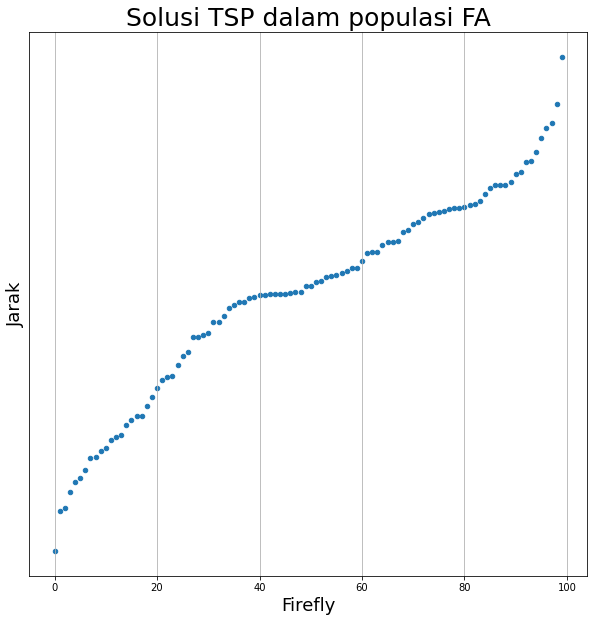

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_title('Solusi TSP dalam populasi FA',fontsize=25)
ax.set_ylabel('Jarak(km)',fontsize=18)
ax.set_xlabel('Individu Firefly',fontsize=18)
ax.set_yticks(np.arange(1,10,0.5))
df1.plot(ax=ax,kind='scatter',y='Jarak',x='Firefly')
ax.grid()

In [ ]:
df1.to_csv('best.csv')
df1.head()

,Jarak,Firefly
0,1876.08,0
1,1955.78,1
2,1961.85,2
3,1993.44,3
4,2014.23,4


**Rute Terbaik**

In [ ]:
df.iloc[0,:-1].astype(int)

Urutan1       11
Urutan2        0
Urutan3        4
Urutan4        7
Urutan5        1
Urutan6       13
Urutan7       12
Urutan8        8
Urutan9       10
Urutan10      14
Urutan11       6
Urutan12       5
Urutan13       9
Urutan14       3
Urutan15       2
Jarak       1876
Name: 0, dtype: int32

**Solusi Terbaik Setiap Iterasi**

<bound method _AxesBase.grid of <AxesSubplot:title={'center':'Solusi Terbaik Per Iterasi'}, xlabel='Iterasi', ylabel='Jarak(km)'>>

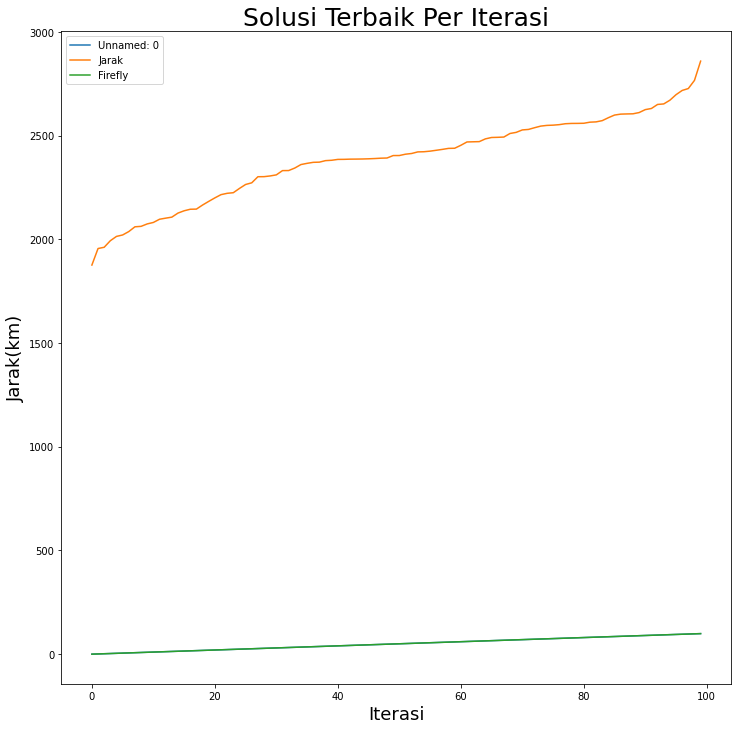

In [ ]:
df2 = pd.read_csv('best.csv')
# df2.columns = ['Jarak Terpendek']

plt.figure(figsize=(12,12))
ax = plt.gca()
ax.set_title('Solusi Terbaik Per Iterasi', fontsize=25)
ax.set_ylabel('Jarak(km)', fontsize=18)
ax.set_xlabel('Iterasi', fontsize=18)
df2.plot(ax=ax)
ax.grid

In [ ]:
delti = pd.read_csv('best.csv')

In [ ]:
delti.head()

,Unnamed: 0,Jarak,Firefly
0,0,1876.08,0
1,1,1955.78,1
2,2,1961.85,2
3,3,1993.44,3
4,4,2014.23,4


# Rata-Rata Pergerakan setiap Firefly

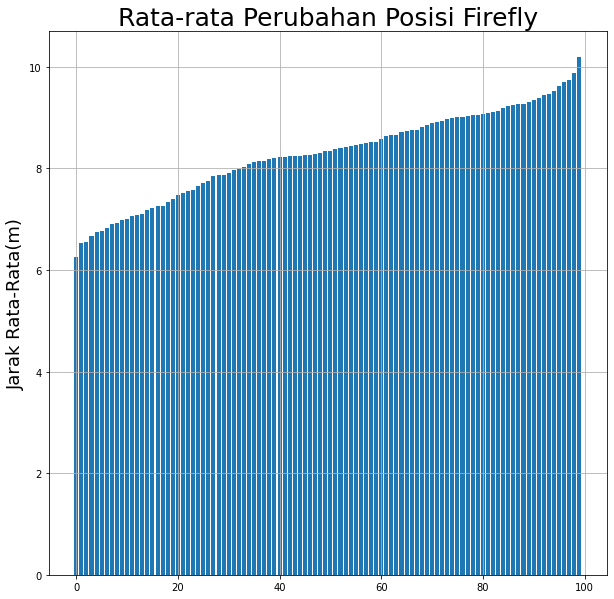

In [ ]:
n_iter = 100
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_title('Rata-rata Perubahan Posisi Firefly',fontsize=25)
ax.set_ylabel('Jarak Rata-Rata(m)',fontsize=18)
res = (delti.mean(axis=1)/n_iter).values
plt.bar(range(res.shape[0]),res)
plt.grid()

# Rata-Rata Pergerakan setiap Firefly di setiap dimensi

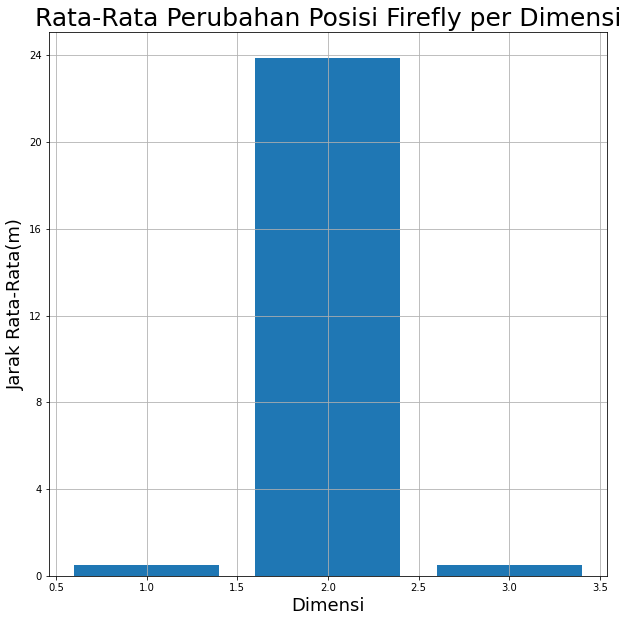

In [ ]:
n_iter = 100
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_title('Rata-Rata Perubahan Posisi Firefly per Dimensi',fontsize=25)
ax.set_ylabel('Jarak Rata-Rata(m)',fontsize=18)
ax.set_xlabel('Dimensi',fontsize=18)
res = (delti.mean(axis=0)/n_iter).values
ax.set_yticks(range(0,int(max(res))+5,4))
plt.bar(range(1,res.shape[0]+1),res)
plt.grid()